In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('feature_extraction.csv')

# Total number of frames
total_frames = len(data)

# Frames with a detection
frames_with_detection = data[(data['height'] > 0) & (data['width'] > 0)]
detected_frames_count = len(frames_with_detection)

# Keypoint detection and confidence calculation
keypoints = ['Kp1', 'Kp2', 'Kp3', 'Kp4', 'Kp5', 'Kp6', 'Kp7', 'Kp8', 'Kp9', 'Kp10', 'Kp11', 'Kp12', 'Kp13', 'Kp14', 'Kp15', 'Kp16', 'Kp17']
keypoint_details = {}

for kp in keypoints:
    pos_x_col = f'PosX {kp}'
    pos_y_col = f'PosY {kp}'
    conf_col = f'Conf {kp}'
    
    # Filter frames where the keypoint is detected
    detected_keypoint_frames = frames_with_detection[(frames_with_detection[pos_x_col] > 0) | (frames_with_detection[pos_y_col] > 0)]
    
    # Calculate average confidence for the detected keypoints
    if not detected_keypoint_frames.empty:
        average_confidence = detected_keypoint_frames[conf_col].mean()
        detection_count = len(detected_keypoint_frames)
    else:
        average_confidence = None
        detection_count = 0
    
    keypoint_details[kp] = {'Average Confidence': average_confidence, 'Detection Count': detection_count}

# Outputs
print("Total frames:", total_frames)
print("Frames with detection:", detected_frames_count)
print("Keypoint detection details:")
for kp, details in keypoint_details.items():
    print(f"{kp}: Average Confidence = {details['Average Confidence']}, Detection Count = {details['Detection Count']}")


Total frames: 111
Frames with detection: 101
Keypoint detection details:
Kp1: Average Confidence = 0.7070306272883164, Detection Count = 76
Kp2: Average Confidence = None, Detection Count = 0
Kp3: Average Confidence = 0.7501085407593671, Detection Count = 85
Kp4: Average Confidence = None, Detection Count = 0
Kp5: Average Confidence = 0.8626795505222521, Detection Count = 95
Kp6: Average Confidence = 0.895207013313969, Detection Count = 96
Kp7: Average Confidence = 0.9806396678874367, Detection Count = 95
Kp8: Average Confidence = 0.7589768781548455, Detection Count = 42
Kp9: Average Confidence = 0.9650465338788135, Detection Count = 94
Kp10: Average Confidence = 0.7599029208338538, Detection Count = 43
Kp11: Average Confidence = 0.9417623819843415, Detection Count = 93
Kp12: Average Confidence = 0.960977131006669, Detection Count = 98
Kp13: Average Confidence = 0.979251256402658, Detection Count = 98
Kp14: Average Confidence = 0.9555921858670761, Detection Count = 98
Kp15: Average Con

In [4]:
import pandas as pd
import os

def load_data(root_dir):
    video_data = {}
    feature_columns = None
    
    for subdir, dirs, files in os.walk(root_dir):
        print(subdir)
        for file in files:
            if file == 'feature_extraction.csv':
                filepath = os.path.join(subdir, file)
                df = pd.read_csv(filepath)
                
                if feature_columns is None:
                    feature_columns = [col for col in df.columns if 'Pos' in col or 'Conf' in col]
                
                width = 1920
                height = 1080
                pos_cols = [col for col in df.columns if 'Posx' in col or 'PosX' in col]
                posy_cols = [col for col in df.columns if 'Posy' in col or 'PosY' in col]
                df[pos_cols] = df[pos_cols] / width
                df[posy_cols] = df[posy_cols] / height
                
                video_data[subdir] = df

    return video_data, feature_columns

def analyze_data(video_data):
    # Combine all video dataframes
    combined_df = pd.concat(video_data.values(), ignore_index=True)
    
    # Calculate the total frames and frames with detections
    total_frames = len(combined_df)
    frames_with_detection = combined_df[(combined_df['height'] > 0) & (combined_df['width'] > 0)]
    detected_frames_count = len(frames_with_detection)
    
    # Calculate the average confidence and detection frequency for each keypoint
    keypoints = [col.split()[1] for col in combined_df.columns if 'Conf' in col]
    keypoint_details = {}
    
    for kp in keypoints:
        conf_col = f'Conf {kp}'
        posx_col = f'PosX {kp}'
        posy_col = f'PosY {kp}'
        
        detected_keypoints = frames_with_detection[(frames_with_detection[posx_col] > 0) | (frames_with_detection[posy_col] > 0)]
        average_confidence = detected_keypoints[conf_col].mean()
        detection_count = detected_keypoints[conf_col].count()
        
        keypoint_details[kp] = {'Average Confidence': average_confidence, 'Detection Count': detection_count}

    # Outputs
    print("Total frames:", total_frames)
    print("Frames with detection:", detected_frames_count)
    print("Keypoint detection details:")
    for kp, details in keypoint_details.items():
        print(f"{kp}: Average Confidence = {details['Average Confidence']}, Detection Count = {details['Detection Count']}")

    return keypoint_details

# Usage
root_dir = 'Frames'
video_data, feature_columns = load_data(root_dir)
keypoint_statistics = analyze_data(video_data)


Frames
Frames\100_Thannheimer Germana_lq
Frames\101_Veit Verena_lq
Frames\102_Ott Louisa_lq
Frames\103_Schmidt Henriette_lq
Frames\104_Dietze Alexandra_lq
Frames\105_Saunus Annika_lq
Frames\106_Haberstumpf Katharina_lq
Frames\107_Zeissler Jule_lq
Frames\108_Dietze Anna_lq
Frames\109_Rekowski Bente_lq
Frames\10_Moosmayer Moritz_lq
Frames\110_Niederacher Agnes_lq
Frames\111_Stocker Hannah_lq
Frames\112_Uschold Fredericka_lq
Frames\113_Wehrle Amelie_lq
Frames\114_Scholz Sina_lq
Frames\116_Gerg Theresa_lq
Frames\118_Eisenlauer Sebastian_lq
Frames\119_Maettig Valentin_lq
Frames\11_Schlegelmilch Felix_lq
Frames\120_Leupold Richard_lq
Frames\121_Leismueller Jakob_lq
Frames\122_Foettinger Michael_lq
Frames\123_Spoetzl Thomas_lq
Frames\124_Schubert Felian_lq
Frames\125_Struebel Josua_lq
Frames\126_Faessler Josef_lq
Frames\127_Bergelt Franz_lq
Frames\128_Heinrich Tom_lq
Frames\129_Wetterling Felix_lq
Frames\12_Goedecke Luis_lq
Frames\131_Hartig Fabian_lq
Frames\133_Knopf Florian_lq
Frames\135_Sc

In [5]:
# import pandas as pd
# import os
# 
# def load_data(root_dir):
#     video_data = {}
#     feature_columns = None
#     
#     for subdir, dirs, files in os.walk(root_dir):
#         print(subdir)
#         for file in files:
#             if file == 'feature_extraction.csv':
#                 filepath = os.path.join(subdir, file)
#                 df = pd.read_csv(filepath)
#                 
#                 if feature_columns is None:
#                     feature_columns = [col for col in df.columns if 'Pos' in col or 'Conf' in col]
#                 
#                 width = 1920
#                 height = 1080
#                 pos_cols = [col for col in df.columns if 'Posx' in col or 'PosX' in col]
#                 posy_cols = [col for col in df.columns if 'Posy' in col or 'PosY' in col]
#                 df[pos_cols] = df[pos_cols] / width
#                 df[posy_cols] = df[posy_cols] / height
#                 
#                 video_data[subdir] = df
# 
#     return video_data, feature_columns

import os
import pandas as pd

def load_data(root_dir):
    video_data = {}
    feature_columns = None
    
    for subdir, dirs, files in os.walk(root_dir):
        # Skip subdirectories that contain '_augmented'
        if '_augmented' in subdir:
            continue

        print(subdir)
        for file in files:
            if file == 'feature_extraction.csv':
                filepath = os.path.join(subdir, file)
                df = pd.read_csv(filepath)
                
                if feature_columns is None:
                    # Initialize feature_columns with the relevant column names
                    feature_columns = [col for col in df.columns if 'Pos' in col or 'Conf' in col]
                
                width = 1920
                height = 1080
                # Normalize position columns by screen width and height
                pos_cols = [col for col in df.columns if 'Posx' in col or 'PosX' in col]
                posy_cols = [col for col in df.columns if 'Posy' in col or 'PosY' in col]
                df[pos_cols] = df[pos_cols] / width
                df[posy_cols] = df[posy_cols] / height
                
                # Store DataFrame in dictionary keyed by directory path
                video_data[subdir] = df

    return video_data, feature_columns

def analyze_data(video_data):
    # Combine all video dataframes
    combined_df = pd.concat(video_data.values(), ignore_index=True)
    
    # Calculate the total frames and frames with detections
    total_frames = len(combined_df)
    frames_with_detection = combined_df[(combined_df['height'] > 0) & (combined_df['width'] > 0)]
    detected_frames_count = len(frames_with_detection)
    
    # Calculate the average confidence and detection frequency for each keypoint
    keypoints = [col.split()[1] for col in combined_df.columns if 'Conf' in col]
    keypoint_details = {}
    
    for kp in keypoints:
        conf_col = f'Conf {kp}'
        posx_col = f'PosX {kp}'
        posy_col = f'PosY {kp}'
        
        detected_keypoints = frames_with_detection[(frames_with_detection[posx_col] > 0) | (frames_with_detection[posy_col] > 0)]
        average_confidence = detected_keypoints[conf_col].mean()
        detection_count = detected_keypoints[conf_col].count()
        detection_percentage = (detection_count / detected_frames_count) * 100
        
        keypoint_details[kp] = {
            'Average Confidence': average_confidence,
            'Detection Count': detection_count,
            'Detection Percentage': detection_percentage
        }

    # Outputs
    print("Total frames:", total_frames)
    print("Frames with detection:", detected_frames_count)
    print("Keypoint detection details:")
    for kp, details in keypoint_details.items():
        print(f"{kp}: Average Confidence = {details['Average Confidence']}, Detection Count = {details['Detection Count']}, Detection Percentage = {details['Detection Percentage']:.2f}%")

    return keypoint_details

# Usage
root_dir = 'Frames'
video_data, feature_columns = load_data(root_dir)
keypoint_statistics = analyze_data(video_data)


Frames
Frames\100_Thannheimer Germana_lq
Frames\101_Veit Verena_lq
Frames\102_Ott Louisa_lq
Frames\103_Schmidt Henriette_lq
Frames\104_Dietze Alexandra_lq
Frames\105_Saunus Annika_lq
Frames\106_Haberstumpf Katharina_lq
Frames\107_Zeissler Jule_lq
Frames\108_Dietze Anna_lq
Frames\109_Rekowski Bente_lq
Frames\10_Moosmayer Moritz_lq
Frames\110_Niederacher Agnes_lq
Frames\111_Stocker Hannah_lq
Frames\112_Uschold Fredericka_lq
Frames\113_Wehrle Amelie_lq
Frames\114_Scholz Sina_lq
Frames\116_Gerg Theresa_lq
Frames\118_Eisenlauer Sebastian_lq
Frames\119_Maettig Valentin_lq
Frames\11_Schlegelmilch Felix_lq
Frames\120_Leupold Richard_lq
Frames\121_Leismueller Jakob_lq
Frames\122_Foettinger Michael_lq
Frames\123_Spoetzl Thomas_lq
Frames\124_Schubert Felian_lq
Frames\125_Struebel Josua_lq
Frames\126_Faessler Josef_lq
Frames\127_Bergelt Franz_lq
Frames\128_Heinrich Tom_lq
Frames\129_Wetterling Felix_lq
Frames\12_Goedecke Luis_lq
Frames\131_Hartig Fabian_lq
Frames\133_Knopf Florian_lq
Frames\135_Sc

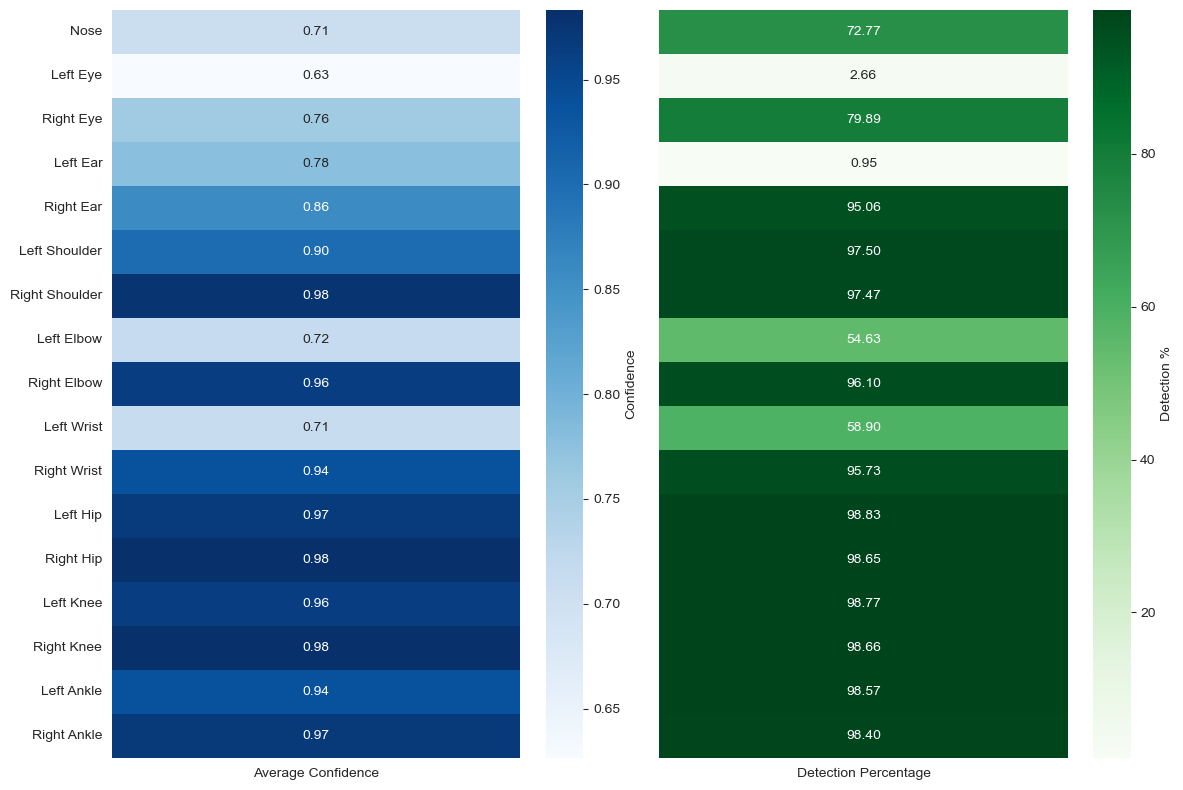

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `keypoint_statistics` is a dictionary with your data
keypoint_names = [
    "Nose", "Left Eye", "Right Eye", "Left Ear", "Right Ear",
    "Left Shoulder", "Right Shoulder", "Left Elbow", "Right Elbow",
    "Left Wrist", "Right Wrist", "Left Hip", "Right Hip",
    "Left Knee", "Right Knee", "Left Ankle", "Right Ankle"
]

# Create a DataFrame from the keypoint statistics for easier plotting
data = {
    'Keypoint': keypoint_names,
    'Average Confidence': [kp_stats['Average Confidence'] for kp_stats in keypoint_statistics.values()],
    'Detection Percentage': [kp_stats['Detection Percentage'] for kp_stats in keypoint_statistics.values()]
}

df = pd.DataFrame(data)
df.set_index('Keypoint', inplace=True)

# Normalizing the data to have a common scale if desired (uncomment to apply)
# df = (df - df.min()) / (df.max() - df.min())

# Create the figure for two heatmaps
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))

# Second heatmap for Detection Percentage
sns.heatmap(df[['Detection Percentage']], annot=True, cmap="Greens", fmt=".2f", cbar_kws={'label': 'Detection %'}, ax=ax[1])
# ax[1].set_title('Detection Percentage')
ax[1].set_ylabel('')  # Remove y-label if preferred
ax[1].set_yticklabels([])  # Hide y-tick labels to avoid repetition

# First heatmap for Average Confidence
sns.heatmap(df[['Average Confidence']], annot=True, cmap="Blues", fmt=".2f", cbar_kws={'label': 'Confidence'}, ax=ax[0])
# ax[0].set_title('Average Confidence')
ax[0].set_ylabel('')  # Remove y-label if preferred

plt.tight_layout()
plt.show()



In [16]:
fig.savefig('heatmap.png')
fig.savefig('heatmap.svg')

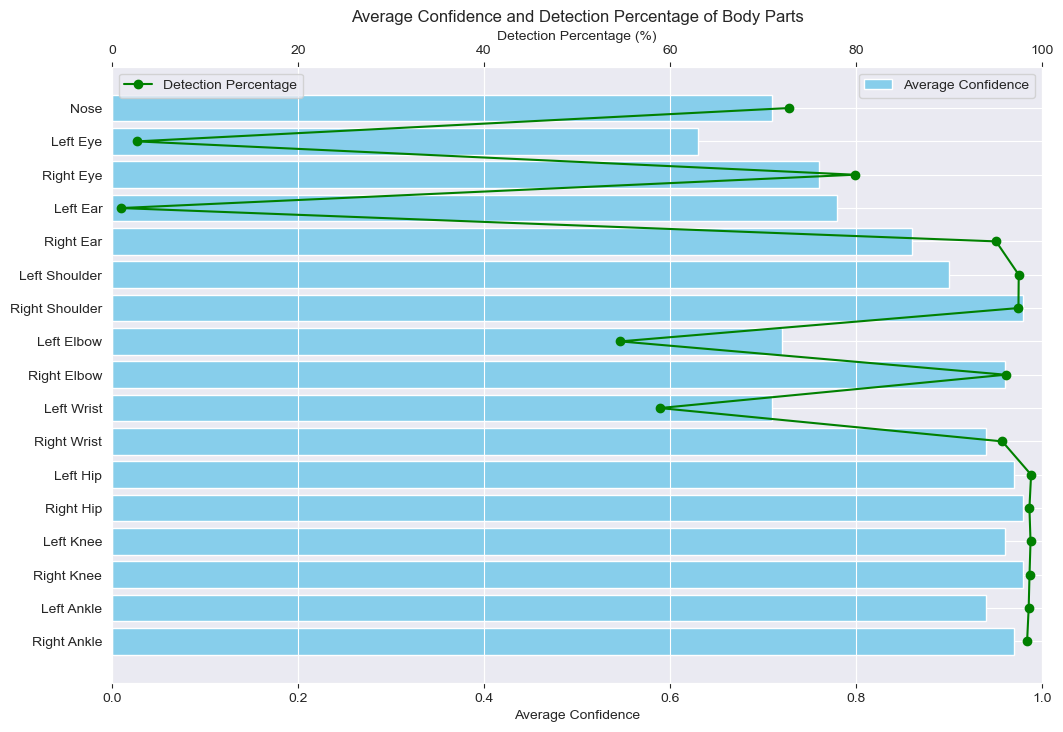

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the image
body_parts = [
    "Nose", "Left Eye", "Right Eye", "Left Ear", "Right Ear",
    "Left Shoulder", "Right Shoulder", "Left Elbow", "Right Elbow",
    "Left Wrist", "Right Wrist", "Left Hip", "Right Hip", "Left Knee",
    "Right Knee", "Left Ankle", "Right Ankle"
]

average_confidence = [
    0.71, 0.63, 0.76, 0.78, 0.86,
    0.90, 0.98, 0.72, 0.96,
    0.71, 0.94, 0.97, 0.98, 0.96,
    0.98, 0.94, 0.97
]

detection_percentage = [
    72.77, 2.66, 79.89, 0.95, 95.06,
    97.50, 97.47, 54.63, 96.10,
    58.90, 95.73, 98.83, 98.65, 98.77,
    98.66, 98.57, 98.40
]

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting average confidence
ax1.barh(body_parts, average_confidence, color='skyblue', label='Average Confidence')
ax1.set_xlabel('Average Confidence')
ax1.set_xlim(0, 1)
ax1.invert_yaxis()  # Invert y axis to have the highest values on top

# Create a twin axis sharing the y-axis
ax2 = ax1.twiny()
ax2.plot(detection_percentage, body_parts, 'g', marker='o', linestyle='-', label='Detection Percentage')
ax2.set_xlabel('Detection Percentage (%)')
ax2.set_xlim(0, 100)

# Adding legend
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')

# Adding title
# plt.title('Average Confidence and Detection Percentage of Body Parts')

# Show plot
plt.show()